In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn

# 46

In [4]:
from sklearn.linear_model import LinearRegression
import itertools  # 組合わせを列挙する

In [8]:
def RSS_min(X,y,T):
    res = LinearRegression()
    S_min=np.inf
    m=len(T)
    for j in range(m):
        q=T[j]
        res.fit(X[:,q],y)
        y_hat=res.predict(X[:,q])
        S=np.linalg.norm(y_hat-y)**2
        if S<S_min:
            S_min=S
            set_q=q
    return(S_min, set_q)

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()
X=boston.data[:,[0,2,4,5,6,7,9,10,11,12]]
y=boston.target

In [25]:
n, p = X.shape
AIC_min = np.inf

for k in range(1,p+1):
    T = list(itertools.combinations(range(p),k))
    # p子からk個選ぶ組み合わせを各列に持つ
    S_min, set_q = RSS_min(X, y, T)
    AIC = n*np.log(S_min) + 2*k  # 空欄(1)
    if AIC < AIC_min:
        AIC_min = AIC  # 空欄(2)
        set_min = set_q  # 空欄(3)

print(AIC_min, set_min)

4770.415163216072 (0, 2, 3, 5, 7, 8, 9)


# 47

In [22]:
n, p = X.shape
BIC_min = np.inf

for k in range(1,p+1):
    T = list(itertools.combinations(range(p),k))
    # p個からk個選ぶ組み合わせを各列に持つ
    S_min, set_q = RSS_min(X, y, T)
    BIC = n*np.log(S_min) + k*np.log(n)
    if BIC < BIC_min:
        BIC_min = BIC
        set_min = set_q

print(BIC_min, set_min)

4796.644613310488 (2, 3, 5, 7, 8, 9)


In [39]:
def AR2(X,y,T):
    res = LinearRegression()
    AR_max = -np.inf
    m=len(T)
    for j in range(m):
        q=T[j]
        n, k = X[:,q].shape
        res.fit(X[:,q],y)
        y_hat=res.predict(X[:,q])
        TSS = np.sum((y-y.mean())**2)
        RSS = np.sum((y-y_hat)**2)
        AR = 1 - (RSS/(n-k-1))/(TSS/(n-1))
        if AR > AR_max:
            AR_max = AR
            set_q=q
    return(AR_max, set_q)

In [40]:
n, p = X.shape
AR_max = -np.inf

for k in range(1,p+1):
    T = list(itertools.combinations(range(p),k))
    # p個からk個選ぶ組み合わせを各列に持つ
    AR, q = AR2(X, y, T)
    if AR > AR_max:
        AR_max = AR
        set_q = q
print(AR_max, set_q)

0.7130213433266739 (0, 2, 3, 5, 7, 8, 9)


# 48

In [42]:
def IC(X,y,k):
    n,p=X.shape
    T=list(itertools.combinations(range(p), k))
    S, set_q=RSS_min(X,y,T)
    AIC = n*np.log(S) + 2*k  # 空欄(1)
    BIC = n*np.log(S) + k*np.log(n)  # 空欄(2)
    return {'AIC':AIC, 'BIC':BIC}

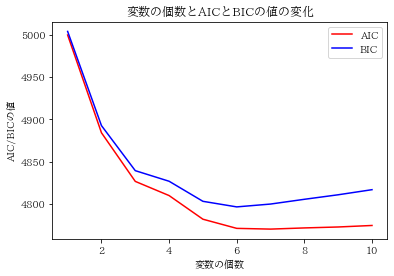

In [43]:
AIC_seq = []
BIC_seq = []

for k in range(1, p+1):
    AIC_seq.append(IC(X, y, k)["AIC"])  # 空欄(3)
    BIC_seq.append(IC(X, y, k)["BIC"])  # 空欄(4)
x_seq = np.arange(1, p+1)
plt.plot(x_seq,AIC_seq,c="red",label="AIC")
plt.plot(x_seq,BIC_seq,c="blue",label="BIC")
plt.xlabel("変数の個数")
plt.ylabel("AIC/BICの値")
plt.title("変数の個数とAICとBICの値の変化")
plt.legend()